# Double Pendulum Normal Modes

In [1]:
from sympy import *
init_printing()

## Input $\{A\}$ and $\{m\}$ matrices

In [11]:
m1, m2, L1, L2, g, omega = symbols('m_1 m_2 L_1 L_2 g omega', real=True)

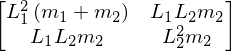

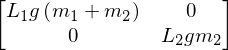

In [16]:
m = Matrix([[(m1 + m2)*L1**2, m2*L1*L2], [m2*L1*L2, m2*L2**2]])
A = g*Matrix([[L1*(m1 + m2), 0], [0, L2*m2]])
display(m)
display(A)

## Get eigenvalues

In [17]:
expr = simplify(det(A - omega**2*m))
display(expr)

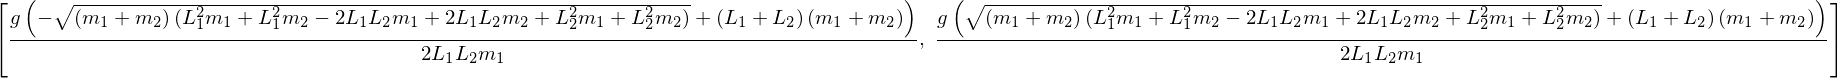

In [24]:
sol = simplify(solve(expr, omega**2))
display(sol)

* Note that we can simplify some terms in the radical:

In [37]:
new_expr = L1**2*m1 - 2*L1*L2*m1 + L2**2*m1
display(new_expr)
display( factor(new_expr) )

In [38]:
new_expr = L1**2*m2 + 2*L1*L2*m2 + L2**2*m2
display(new_expr)
display( factor(new_expr) )

* See what happens when $m_1 = m_2$ and $L_1 = L_2$

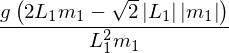

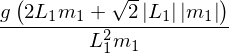

In [27]:
substitutions = {m2: m1, L2: L1}
display( simplify( sol[0].subs(substitutions) ) )
display( simplify( sol[1].subs(substitutions) ) )

## Get eigenvectors

In [20]:
L = A - omega**2*m
b = Matrix([0, 0])

In [21]:
a1, a2 = symbols('a_1 a_2')

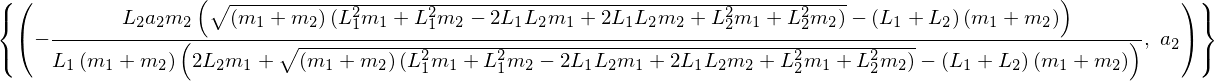

In [56]:
a1_vec = linsolve((L.subs(omega**2, sol[0]), b), [a1, a2])
display(a1_vec)

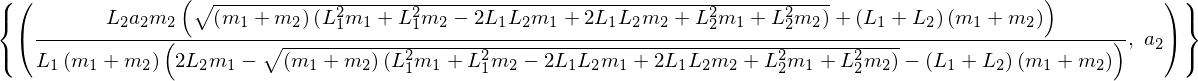

In [57]:
a2_vec = linsolve((L.subs(omega**2, sol[1]), b), [a1, a2])
display(a2_vec)

* See what happens in the simplified case

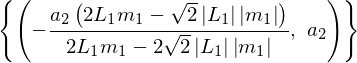

In [40]:
simplify( linsolve((L.subs(omega**2, sol[0]), b), [a1, a2]).subs({L2: L1, m2: m1}) )

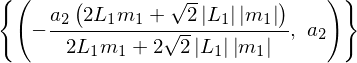

In [41]:
simplify( linsolve((L.subs(omega**2, sol[1]), b), [a1, a2]).subs({L2: L1, m2: m1}) )

## Find normal modes

In [87]:
alpha, beta, gamma, delta = symbols('alpha beta gamma delta')

In [96]:
a11 = gamma*(alpha - beta)/(delta + beta - alpha)
a12 = -gamma*(alpha + beta)/(alpha + beta - delta)
a21 = 1
a22 = 1

In [97]:
theta1, theta2, eta1, eta2 = symbols('theta_1 theta_2 eta_1 eta_2')

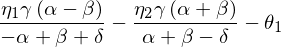

In [98]:
eq1 = a11*eta1 + a12*eta2 - theta1
display(eq1)
eq2 = a21*eta1 + a22*eta2 - theta2
display(eq2)

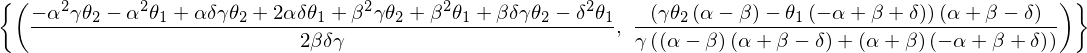

In [99]:
eta_sol = linsolve([eq1, eq2], (eta1, eta2))
display(eta_sol)

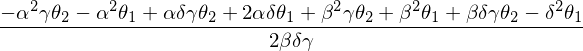

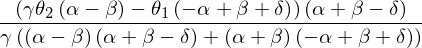

In [101]:
eta1_sol = simplify(eta_sol.args[0][0])
eta2_sol = eta_sol.args[0][1]
display(eta1_sol, eta2_sol)

In [109]:
expr1 = -alpha**2*theta1 + 2*alpha*delta*theta1 - delta**2*theta1 + beta**2*theta1
expr2 = beta**2*gamma*theta2 + alpha*delta*gamma*theta2  + beta*delta*gamma*theta2 - alpha**2*gamma*theta2
display( factor(expr1) )
display( factor(expr2) )

* Now we try for the case of $L_1 = L_2$ and $m_1 = m_2$

In [102]:
a11 = (2 - sqrt(2))/(2*sqrt(2) - 2)
a12 = -(2 + sqrt(2))/(2 + 2*sqrt(2))
a21 = 1
a22 = 1

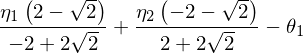

In [103]:
eq1 = a11*eta1 + a12*eta2 - theta1
display(eq1)
eq2 = a21*eta1 + a22*eta2 - theta2
display(eq2)

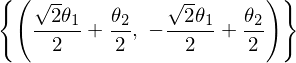

In [104]:
linsolve([eq1, eq2], (eta1, eta2))